In [1]:
# mount drive
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/patrec

Mounted at /content/drive
/content/drive/MyDrive/patrec


In [2]:
#import requires libraries & lib.py file

import numpy as np
from matplotlib import pyplot as plt
from lib import *
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
#STEP 1

train = np.loadtxt('/content/drive/MyDrive/patrec/data/train.txt')
test = np.loadtxt('/content/drive/MyDrive/patrec/data/test.txt')

X_train = train[:, 1:]
y_train = train[:, 0]

X_test = test[:, 1:]
y_test = test[:, 0]



In [4]:
#lib.py  ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics as stats

def show_sample(X, index):
    '''Takes a dataset (e.g. X_train) and imshows the digit at the corresponding index
    Args:
        X (np.ndarray): Digits data (nsamples x nfeatures)
        index (int): index of digit to show
    '''
    plt.imshow(np.reshape(X[index], (16,16)), cmap = 'gray')
    plt.title(str(index)+ '-th digit')

def plot_digits_samples(X, y):
    '''Takes a dataset and selects one example from each label and plots it in subplots
    Args:
        X (np.ndarray): Digits data (nsamples x nfeatures)
        y (np.ndarray): Labels for dataset (nsamples)
    '''
   
    # use digit 0-9 to organize y's data represented by index in table indices_for_digit 
    indices_for_digit = [[] for i in range(10)]
    for i, digit in enumerate(y):
         indices_for_digit[int(digit)].append(i)

    # select one index from each digit in random (using random.choise function)
    digit_samples = []
    for i in range(10):
        digit_samples.append(random.choice(indices_for_digit[i]))
    
    # plot the randomly chosen samples
    fig, ax = plt.subplots(1, 10, figsize=(20, 3))
    fig.suptitle("random digits 0-9", fontsize=15)
    fig.tight_layout()
    #fig.subplots_adjust(top=2)
    for i in range(10):
        ax[i].imshow(np.reshape(X[digit_samples[i]], (16,16)), cmap = 'gray')
        ax[i].set_title('digit : {}'.format(i))
    plt.show()

def digit_mean_at_pixel(X, y, digit, pixel=(10, 10)):
    '''Calculates the mean for all instances of a specific digit at a pixel location

    Args:
        X (np.ndarray): Digits data (nsamples x nfeatures)
        y (np.ndarray): Labels for dataset (nsamples)
        digit (int): The digit we need to select
        pixels (tuple of ints): The pixels we need to select.

    Returns:
        (float): The mean value of the digits for the specified pixels
    '''
    digit_indices = np.where(y==digit)[0]
    pixel_values = []
    for index in digit_indices:
      pixel_values.append(X[index][pixel[0]*16+pixel[1]])
    return stats.mean(pixel_values)

def digit_variance_at_pixel(X, y, digit, pixel=(10, 10)):
    '''Calculates the variance for all instances of a specific digit at a pixel location

    Args:
        X (np.ndarray): Digits data (nsamples x nfeatures)
        y (np.ndarray): Labels for dataset (nsamples)
        digit (int): The digit we need to select
        pixels (tuple of ints): The pixels we need to select

    Returns:
        (float): The variance value of the digits for the specified pixels
    '''
    digit_indices = np.where(y==digit)[0]
    pixel_values = []
    for index in digit_indices:
      pixel_values.append(X[index][pixel[0]*16+pixel[1]])
    return stats.variance(pixel_values)

def digit_mean(X, y, digit):
    '''Calculates the mean for all instances of a specific digit

    Args:
        X (np.ndarray): Digits data (nsamples x nfeatures)
        y (np.ndarray): Labels for dataset (nsamples)
        digit (int): The digit we need to select

    Returns:
        (np.ndarray): The mean value of the digits for every pixel
    '''
    digit_indices = np.where(y==digit)[0]
    means = [[digit_mean_at_pixel(X, y, digit, (i,j)) for j in range(16)] for i in range(16)]
    return np.array(means).reshape(-1)



def digit_variance(X, y, digit):
    '''Calculates the variance for all instances of a specific digit

    Args:
        X (np.ndarray): Digits data (nsamples x nfeatures)
        y (np.ndarray): Labels for dataset (nsamples)
        digit (int): The digit we need to select

    Returns:
        (np.ndarray): The variance value of the digits for every pixel
    '''

    digit_indices = np.where(y==digit)[0]
    variances = [[digit_variance_at_pixel(X, y, digit, (i,j)) for j in range(16)] for i in range(16)]
    return np.array(variances).flatten()
    
def euclidean_distance(s, m):
    '''Calculates the euclidean distance between a sample s and a mean template m

    Args:
        s (np.ndarray): Sample (nfeatures)
        m (np.ndarray): Template (nfeatures)

    Returns:
        (float) The Euclidean distance between s and m
    '''
    return euclidean_distances(s.reshape(1, -1), m.reshape(1, -1))

def euclidean_distance_classifier(X, X_mean):
    '''Classifiece based on the euclidean distance between samples in X and template vectors in X_mean

    Args:
        X (np.ndarray): Digits data (nsamples x nfeatures)
        X_mean (np.ndarray): Digits data (n_classes x nfeatures)

    Returns:
        (np.ndarray) predictions (nsamples)
    '''
    predictions = []
    for sample in X:
       euclidean_distances_digit_current = [euclidean_distance(sample, X_mean[i]) for i in range(10)]
       pred = np.argmin(min(euclidean_distances_digit_current))
       predictions.append(pred)

    return np.array(predictions)


STEP 2

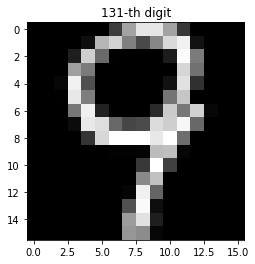

In [5]:
#STEP 2  ----------------------------------------------------------
show_sample(X_train, 131)


STEP 3

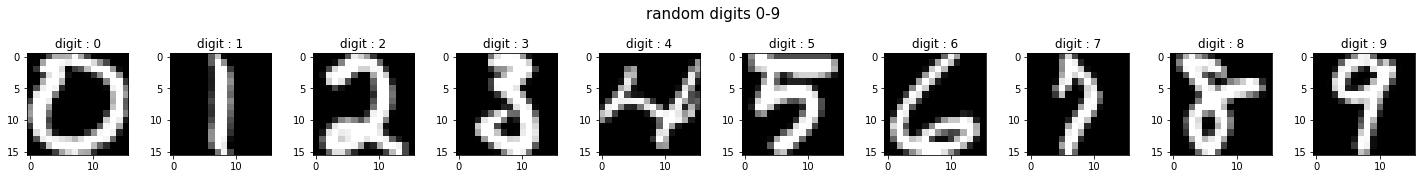

In [6]:
#STEP 3  ----------------------------------------------------------
plot_digits_samples(X_train, y_train)

STEP 4

In [7]:
#STEP 4  ----------------------------------------------------------
mean_0_10_10 = digit_mean_at_pixel(X_train, y_train, 0, (10,10))
print(f'Mean value of attributes of (10,10) pixel for digit 0 is {mean_0_10_10:.3f}')

Mean value of attributes of (10,10) pixel for digit 0 is -0.504


STEP 5

In [8]:
#STEP 5  ----------------------------------------------------------
variance_0_10_10 = digit_variance_at_pixel(X_train, y_train, 0, (10,10))
print(f'Variance value of attributes of (10,10) pixel for digit 0 is {variance_0_10_10:.3f}')

Variance value of attributes of (10,10) pixel for digit 0 is 0.525


STEP 6

In [9]:
#STEP 6  ----------------------------------------------------------
mean_0 = digit_mean(X_train, y_train, 0)
variance_0 = digit_variance(X_train, y_train, 0)

STEP 7

(-0.5, 15.5, 15.5, -0.5)

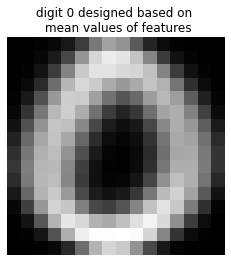

In [10]:
#STEP 7  ----------------------------------------------------------
fig, ax = plt.subplots()
ax.imshow(mean_0.reshape((16,16)), cmap = 'gray')
ax.set_title('digit 0 designed based on \n mean values of features')
ax.axis('off')

STEP 8

(-0.5, 15.5, 15.5, -0.5)

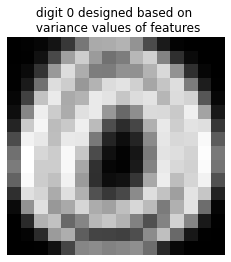

In [11]:
#STEP 8  ----------------------------------------------------------
fig, ax = plt.subplots()
ax.imshow(variance_0.reshape((16,16)), cmap = 'gray')
ax.set_title('digit 0 designed based on \n variance values of features')
ax.axis('off')

Comparison

Text(0.5, 0.98, 'comparison')

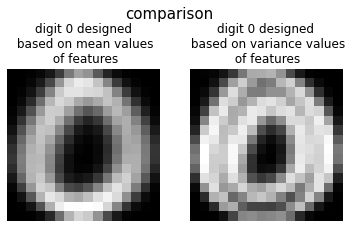

In [12]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(mean_0.reshape((16,16)), cmap = 'gray')
ax[0].set_title('digit 0 designed\n based on mean values\n of features')
ax[0].axis('off')
ax[1].imshow(variance_0.reshape((16,16)), cmap = 'gray')
ax[1].set_title('digit 0 designed\n based on variance values\n of features')
ax[1].axis('off')
fig.suptitle("comparison", fontsize=15)

In [13]:
#STEP 9  ----------------------------------------------------------

#a  ----------------------------------------------------------

#means and variance values of digits' features
digit_means = [digit_mean(X_train, y_train, i) for i in range(10)]
digit_variances = [digit_variance(X_train, y_train, i) for i in range(10)]


Text(0.5, 0.98, 'digits designed based on mean values of features')

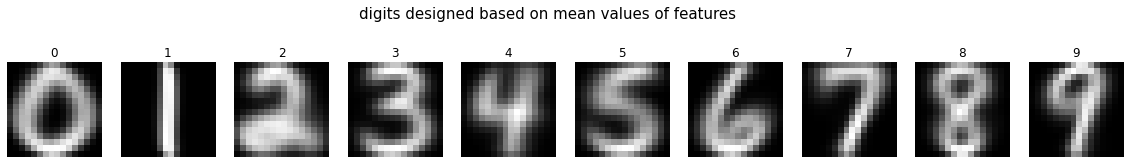

In [14]:
#b  ----------------------------------------------------------
fig, ax = plt.subplots(1,10,figsize=(20, 3))
for i in range(10):
  ax[i].imshow(digit_means[i].reshape((16,16)), cmap = 'gray')
  ax[i].set_title(f'{i}')
  ax[i].axis('off')

fig.suptitle("digits designed based on mean values of features", fontsize=15)

In [15]:
#STEP 10  ----------------------------------------------------------

#table of euclidean distances of each 0-9 digit's mean features 
#the 101 digit's features (101 digit of test data)
euclidean_distances_digit_101 = [euclidean_distance(digit_means[i], X_test[101]) for i in range(10)]

digit_101_category = np.argmin(min(euclidean_distances_digit_101))
print(f'According to euclidean distance, digit no 101 of test data is classified as the digit {digit_101_category}.')

#check known labels of test set to find out if the above classification is correct or not
eval_101 = "correct" if digit_101_category == y_train[101] else "wrong"
print("This classification is " + eval_101 + ".")

According to euclidean distance, digit no 101 of test data is classified as the digit 0.
This classification is correct.


In [16]:
#STEP 11  ----------------------------------------------------------
#TODO 
#sth wrong with classifier - too low success percentage
predictions_test_set = euclidean_distance_classifier(X_test, digit_means)
success_percent = (np.sum(predictions_test_set == y_test))/len(y_test)
print(f'The success percentage for the classifier is {success_percent*100} %.')


The success percentage for the classifier is 17.887394120577977 %.
